In [7]:
from pipeline.backend.pipeline import PipeLine
from pipeline.component import DataTransform
from pipeline.component import Reader
from pipeline.component import HomoNN
from pipeline.interface import Data

pipeline = PipeLine() \
        .set_initiator(role='guest', party_id=8888) \
        .set_roles(guest=8888, host=[10000], arbiter=10000)

reader_0 = Reader(name="reader_0")
# set guest parameter
reader_0.get_party_instance(role='guest', party_id=8888).component_param(
    table={"name": "breast_homo_guest", "namespace": "experiment"})
# set host parameter
reader_0.get_party_instance(role='host', party_id=10000).component_param(
    table={"name": "breast_homo_host", "namespace": "experiment"})

data_transform_0 = DataTransform(name="data_transform_0", with_label=True)
# set guest parameter
data_transform_0.get_party_instance(role='guest', party_id=8888).component_param(
    with_label=True)
data_transform_0.get_party_instance(role='host', party_id=[10000]).component_param(
    with_label=True)

homo_nn_0 = HomoNN(
    name="homo_nn_0", 
    max_iter=100, 
    batch_size=-1, 
    early_stop={"early_stop": "diff", "eps": 0.0001})
from tensorflow.keras.layers import Dense
homo_nn_0.add(
    Dense(units=1, input_shape=(10,), activation="sigmoid"))

from tensorflow.keras import optimizers
homo_nn_0.compile(
    optimizer=optimizers.Adam(learning_rate=0.05), 
    metrics=["accuracy", "AUC"],
    loss="binary_crossentropy")

pipeline.add_component(reader_0)
pipeline.add_component(data_transform_0, data=Data(data=reader_0.output.data))
pipeline.add_component(homo_nn_0, data=Data(train_data=data_transform_0.output.data))

pipeline.compile();

In [8]:
pipeline.fit()

2022-11-29 09:59:47.466 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:83 - Job id is 202211290959468689180

2022-11-29 09:59:47.475 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:98 - Job is still waiting, time elapse: 0:00:00
m2022-11-29 09:59:49.514 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:125 - 
2022-11-29 09:59:49.516 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component reader_0, time elapse: 0:00:02
2022-11-29 09:59:50.533 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component reader_0, time elapse: 0:00:03
2022-11-29 09:59:51.549 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component reader_0, time elapse: 0:00:04
2022-11-29 09:59:52.567 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component reader_0, time elapse: 0:00:05
2022-11-29 09:59:53.585 | INFO     

2022-11-29 10:00:25.111 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:00:37
2022-11-29 10:00:26.126 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:00:38
2022-11-29 10:00:27.142 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:00:39
2022-11-29 10:00:28.157 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:00:40
2022-11-29 10:00:29.175 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:00:41
2022-11-29 10:00:30.193 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:00:42
2022-11-29 10:00:31.208 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running

2022-11-29 10:01:04.771 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:01:17
2022-11-29 10:01:05.786 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:01:18
2022-11-29 10:01:06.805 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:127 - Running component homo_nn_0, time elapse: 0:01:19
2022-11-29 10:01:08.830 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:89 - Job is success!!! Job id is 202211290959468689180
2022-11-29 10:01:08.832 | INFO     | pipeline.utils.invoker.job_submitter:monitor_job_status:90 - Total time: 0:01:21


In [11]:
summary = pipeline.get_component("homo_nn_0").get_summary()
summary

{'is_converged': False,
 'loss_history': [0.48428434133529663,
  0.3453121781349182,
  0.2652832269668579,
  0.21403385698795319,
  0.17828251421451569,
  0.15211988985538483,
  0.1325979232788086,
  0.11783871799707413,
  0.1064712405204773,
  0.09753447026014328,
  0.09038496017456055,
  0.08458822965621948,
  0.07983948290348053,
  0.07591477036476135,
  0.07264205068349838,
  0.06988400965929031,
  0.06752811372280121,
  0.06548137217760086,
  0.0636676624417305,
  0.062026407569646835,
  0.06051146984100342,
  0.05908983573317528,
  0.05773979052901268,
  0.056448813527822495,
  0.05521133542060852,
  0.0540265254676342,
  0.0528964027762413,
  0.05182424187660217,
  0.05081336572766304,
  0.049866314977407455,
  0.04898436740040779,
  0.04816732555627823,
  0.04741351678967476,
  0.046719957143068314,
  0.04608260840177536,
  0.045496679842472076,
  0.04495692625641823,
  0.04445799067616463,
  0.04399464279413223,
  0.04356197640299797,
  0.04315561801195145,
  0.042771764099597

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


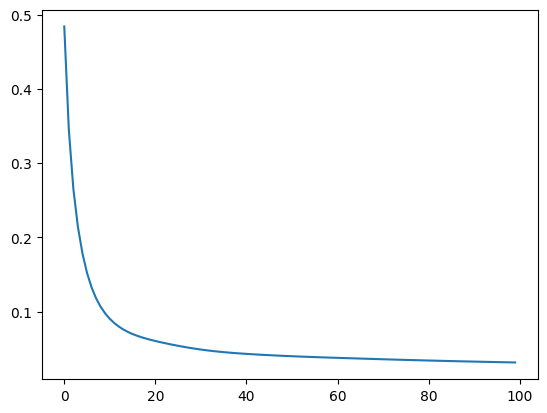

In [12]:
%pylab inline
pylab.plot(summary['loss_history'])